# RED NEURONAL CONVOLUCIONAL - EJERCICIO GUIADO - DATASET MINST

## INFORMACIÓN SOBRE EL DATASET    

El dataset que usaremos en este ejercicio es el dataset MNIST, y contiene un total de 70,000 imágenes (60,000 de entrenamiento y 10,000 de validación), cada una de ellas en escala de gris y con un tamaño de 28×28.

Las imágenes contienen los dígitos del 0 al 9, escritos por diferentes personas:   

<div align="center">
  <img src="./img/ejemplos-imagenes-set-mnist.png" width="600">
</div>

El objetivo es implementar un clasificador capaz de determinar a qué dígito corresponde cada imagen, independientemente de cómo este haya sido escrito.   

Para ello usaremos **LeNet**, la arquitectura precursora de todas las Redes Convolucionales usadas en la actualidad y cuyo esquema se puede ver a continuación:   

<div align="center">
    <img src="./img/red-convolucional-lenet.png" width="1000">
</div>


En esta arquitectura se observan los siguientes componentes:    

- La entrada a esta red es una imagen de 28×28, que contendrá un dígito escrito a mano.
- Posteriormente la red usa una serie de capas convolucionales y de max-pooling, para de manera progresiva extraer las características más relevantes de cada imagen. A medida que vamos más profundo en estas capas convolucionales, el ancho y alto de las imágenes resultantes va disminuyendo (pasando de 28×28 a 24×24, 12×12, 8×8 y 4×4) pero a la vez la profundidad de las mismas va en aumento (pasando de 1 a 6 y a 16). Esta profundidad indica precisamente que en las capas más ocultas se extraen más características de cada imagen.
- El objetivo del entrenamiento de esta red convolucional es precisamente entrenar los filtros CONV1 y CONV2 para que “aprendan” a extraer las características relevantes de cada una de las 60,000 imágenes de entrenamiento.
- La salida de las capas convolucionales es un volumen de 4x4x16, que contiene las características más relevantes de las imágenes de entrenamiento.
- En la etapa de salida, y para realizar la clasificación, se usa una pequeña Red Neuronal. Para ello primero se “aplana” el volumen de 4x4x16 de la etapa anterior, obteniendo así un vector de 256×1. Este es llevado a la Red Neuronal que tiene dos capas ocultas, la primera con 120 neuronas y la segunda con 84.
- Finalmente, la categoría a la que pertenece cada imagen es determinada por la capa de salida de esta red, que consiste en una función de activación softmax con 10 salidas (correspondientes a cada una de las posibles categorías, los dígitos del 0 al 9)

## Implementación del modelo

### 1. Importamos librerias

In [2]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

from keras.datasets import mnist # Importamos el conjunto de datos MNIST
from tensorflow.keras.utils import to_categorical # Utilidades para el preprocesamiento de datos
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

### 2. Cargamos conjunto de datos a TRAIN y TEST

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"TRAIN data shape: {x_train.shape}")
print(f"TEST data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
TRAIN data shape: (60000, 28, 28)
TEST data shape: (10000, 28, 28)


### 3. Normalización de las imágenes   

Se procede a normalizar cada una de las imágenes, para que cada pixel esté en el rango de 0 a 1 (y no de 0 a 255). Esto es necesario para garantizar la convergencia del algoritmo del Gradiente Descendente durante el entrenamiento. De no realizar la normalización se produciría lo siguiente:   

🔹 1. El gradiente descendente sería más inestable

El algoritmo que ajusta los pesos (gradiente descendente) funciona calculando cambios pequeños. Si las entradas son muy grandes (255), los cambios pueden ser:

- demasiado bruscos
- la red tarda mucho más en aprender
- incluso puede no converger (no aprender nada)

🔹 2. Los pesos de las capas se desbalancean

Los pesos de la red empiezan siendo números pequeñitos (por ejemplo 0.01). Si multiplicas esos pesos por valores enormes como 255, todo se “dispara”.

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

A continuación se convierten las etiquetas de los sets de entrenamiento y validación al formato **one-hot**, usando la función «to_categorical(...)». En este formato, cada categoría estará representada con una secuencia de números binarios: por ejemplo los dígitos que pertenezcan a la categoría 4 serán representados por la secuencia [0,0,0,0,1,0,0,0,0,0] (de ahí el nombre one-hot: sólo uno de los dígitos será diferente de cero):

In [5]:
nclases = 10
y_train = to_categorical(y_train,nclases)
y_test = to_categorical(y_test,nclases)

Visualización de una imagen de muestra

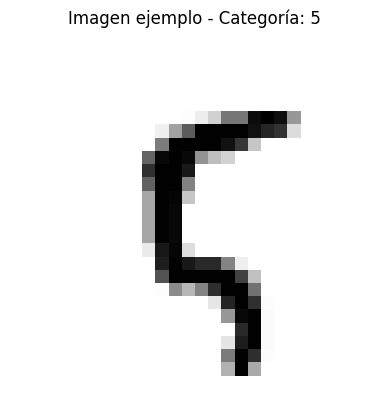

In [6]:
nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()

Finalmente, se reajustan las imágenes de entrenamiento y validación, para indicar explícitamente a Keras que cada imagen tendrá un solo canal de información (por tratarse de imágenes en escala de gris).   

Para esto se utiliza la función «reshape» de Numpy:

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

### 4. Construcción de la arquitectura del modelo de red CNN   

La arquitectura de la red debe seguir las características reflejadas en la siguiente tabla:   

<div align="center">
    <img src="./img/arquitecturaLeNet_tabla.png" width="600">
</div>

In [ ]:
# Construimos el modelo

model = ....

In [ ]:
# Añadimos capa convolucional al modelo

model.add(...)

In [ ]:
# Añadimos capa pooling al modelo

model.add(...)

In [ ]:
# Seguimos añadiendo capas al modelo de tipo Conv2D y MaxPooling2D, siguiendo la estructura de la tabla anterior.
...

In [ ]:
# Aplanamos las matrices 2D a vectores 1D

In [ ]:
# Añadimos la primera capa densa (fully connected) (120 neuronas y función de activación ReLU)

In [ ]:
# Añadimos la segunda capa densa (fully connected) (84 neuronas y función de activación ReLU)

In [ ]:
# Añadimos la capa densa de salida con función de activación softmax

In [ ]:
# Compilamos el modelo (optimizer SGD, loss categorical_crossentropy, metrics accuracy)

In [ ]:
# Entrenamos el modelo (batch_size=128, epochs=10, validation_data=(x_test, y_test))

In [ ]:
# Evaluamos el modelo con los datos de test

print(model.evaluate(x_train, y_train, batch_size=128))


from matriz_confusion import graficar_matriz_de_confusion

y_pred = model.predict_classes(x_test)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)